# Create a simple dataset

In [119]:
import numpy as np
import pandas as pd
from pyspark.sql import SparkSession

# Crie uma sessão Spark
spark = SparkSession.builder.appName("Criar DataFrame").getOrCreate()

# Crie uma lista de valores para a coluna `teste`
values = [("a", "1200", "0","2023-10-10"),
          ("b", "2015", "1","2023-10-10"),
          ("b", "5511", "1","2023-10-10"),
          ("a", "2112", "1","2023-10-10"),
          ("b", "8115", "0","2023-10-10"),
          ("a", "9245", "1","2023-10-10"),
          ("a", "1825", "0","2023-10-10"),
           ("b", "205", "1","2023-10-10"),
          ("b", "551", "1","2023-10-10"),
          ("a", "212", "1","2023-10-10"),
          ("b", "815", "0","2023-10-10"),
          ("a", "925", "1","2023-10-10"),
          ("a", "185", "0","2023-10-10")
         ]

# Crie uma lista de valores para a coluna `cpf`
columns = ['teste','cpf','fl_contratacao','dat_ref_carga']

# Crie um DataFrame Spark
df = spark.createDataFrame(values,columns)

# Exiba o DataFrame
df.show()

+-----+----+--------------+-------------+
|teste| cpf|fl_contratacao|dat_ref_carga|
+-----+----+--------------+-------------+
|    a|1200|             0|   2023-10-10|
|    b|2015|             1|   2023-10-10|
|    b|5511|             1|   2023-10-10|
|    a|2112|             1|   2023-10-10|
|    b|8115|             0|   2023-10-10|
|    a|9245|             1|   2023-10-10|
|    a|1825|             0|   2023-10-10|
|    b| 205|             1|   2023-10-10|
|    b| 551|             1|   2023-10-10|
|    a| 212|             1|   2023-10-10|
|    b| 815|             0|   2023-10-10|
|    a| 925|             1|   2023-10-10|
|    a| 185|             0|   2023-10-10|
+-----+----+--------------+-------------+



# Import pyspark MAB lib

In [106]:
import MultiArmedBanditRL as RL

# Testing

### 1) Testing choose the best option using prior distribution

In [111]:
model_with_priors = RL.Mab(priors= df,
           reward = "fl_contratacao",
           variable_test = ['a','b'],
           log_results = True)

### 1.1) Epsilon greedy

In [112]:
model_with_priors.EpsilonGreedy(epsilon =0.15)

Results
Exploration - The best next feature to choose is b
(P = 0.7686043599191003, Epsilon = 0.15
Actual distribution
+-----+------------------+
|teste|         conversao|
+-----+------------------+
|    b|0.6666666666666666|
|    a|0.5714285714285714|
+-----+------------------+



'b'

### 1.2) Upper confidence Bound

In [113]:
model_with_priors.Ucb()

Results
The best next feature to choose is b
Actual distribution
+-----+------------------+------------+--------+------------------+
|teste|         conversao|total_rounds|qtd_cpfs|               ucb|
+-----+------------------+------------+--------+------------------+
|    b|0.6666666666666666|          13|       6|1.9102018597621266|
|    a|0.5714285714285714|          13|       7|1.6841182931445793|
+-----+------------------+------------+--------+------------------+



'b'

### 1.3) Thompson Sampling

23/10/24 20:39:50 WARN CacheManager: Asked to cache already cached data.


best feature to choose -->  b
+-----+---+----+----+------------------+
|teste|qtd|alfa|beta|          exp_prob|
+-----+---+----+----+------------------+
|    a|  7| 4.0| 3.0|0.6113437982093834|
|    b|  6| 4.0| 2.0| 0.844609836124914|
+-----+---+----+----+------------------+



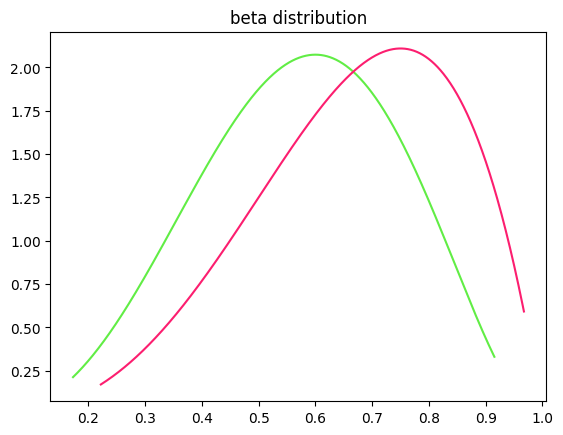

<Figure size 800x500 with 0 Axes>

'b'

In [114]:
model_with_priors.ThompsonSampling()

### 2) Testing choose the best option without prior distribution

In [115]:
model_with_priors = RL.Mab(
           reward = "fl_contratacao",
           variable_test = ['a','b'],
           log_results = True)

### 2.1) Epsilon greedy

In [116]:
model_with_priors.EpsilonGreedy(epsilon =0.15)

(P = 0.2542571184779454, Epsilon = 0.15
Exploration - The best next feature to choose is b
We dont define priors, so we choose a random option


'b'

### 2.2) Upper confidence Bound

In [117]:
model_with_priors.Ucb()

Exploration - The best next feature to choose is b
We dont define priors, so we choose a random option


'b'

### 2.3) Thompson Sampling

In [118]:
model_with_priors.ThompsonSampling()

Exploration - The best next feature to choose is b
We dont define priors, so we choose a random option


'b'